# Алгоритм Кока-Янгера-Касамі для перевірки бінарного додавання у стовпчик
*Шкаліков Олег, ФІ-81*

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from PIL import Image

from cv.grammar import BinaryAdditionGrammar, cyk

Завантажимо у відповідні масиви маски термінальних символів $0$ та $1$.

In [2]:
zero_mask = ~np.asarray(Image.open('masks/0.png').convert('L'), dtype=bool)
one_mask = ~np.asarray(Image.open('masks/1.png', ).convert('L'), dtype=bool)

Створимо функцію, яка дозволить генерувати приклад з масок

In [3]:
def generate_image(equation):
    columns = []    
    for j in range(equation.shape[1]):
        rows = []
        for i in range(3):
            if equation[i, j] == 1:
                rows.append(one_mask)
            elif equation[i, j] == 0:
                rows.append(zero_mask)
        columns.append(np.vstack(rows))

    return np.hstack(columns)

In [4]:
eq = np.array([[1, 1, 0, 1, 1],
               [1, 0, 1, 0, 1],
               [1, 0, 0, 0, 0]])
eq_image = generate_image(eq)

Якщо ж ви хочете використати свої власні чорно-білі зображення, то розкоментуйте комірку нижче та вкажіть правильний шлях

In [5]:
# path = 'test_eq.png' #your path here
# eq_image = ~np.asarray(Image.open(path).convert('L'), dtype=bool)

Зобразимо той приклад, правильність якого ми будемо намагатися дізнатися за допомогою нашої 2-вимірної граматики

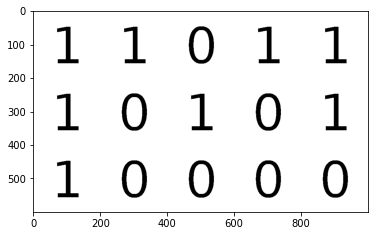

In [6]:
plt.imshow(eq_image, cmap='gray_r')

Створимо граматику, передавши у якості параметрів маски $0$ та $1$

In [7]:
grammar = BinaryAdditionGrammar(zero_mask, one_mask)

У граматиці є 2 початкових символа, один з них відповідає тому, що приклад є правильним, а другий тому, що зліва потрібен ще біт переносу. Створимо функції, яка допоможе за результатом роботи алгоритму вказувати на це

In [8]:
def check_binary_addition(image, grammar): 
    res = cyk(image, grammar)    
    if res[0]:
        print('Equation is correct')
    elif res[1]:
        print('Equation requires carry bit')
    else:
        print('Equation is incorrect')

Й на сам кінець, запустимо алгоритм

In [9]:
check_binary_addition(eq_image, grammar)

Equation requires carry bit


Як ми бачимо, відповідь правильна!